<a href="https://colab.research.google.com/github/felista47/Classification-algorithms/blob/main/Classification_Practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#reading the data
df=pd.read_csv("/content/drive/MyDrive/ENGAGE/PRACTICE/Classification_Dataset/diabetes_prediction_dataset.csv")
#displaying the first five rows
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [45]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [46]:
# encoding on gender
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'gender' column
df['gender'] = label_encoder.fit_transform(df['gender'])
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [48]:
df["smoking_history"]= pd.factorize(df["smoking_history"])[0]
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
5,0,20.0,0,0,0,27.32,6.6,85,0
6,0,44.0,0,0,0,19.31,6.5,200,1
7,0,79.0,0,0,1,23.86,5.7,85,0
8,1,42.0,0,0,0,33.64,4.8,145,0
9,0,32.0,0,0,0,27.32,5.0,100,0


In [49]:
#Seperating the x and the y variables and converting them to numpy array
X=df.drop(columns=["diabetes"])
y=df['diabetes']
X=X.to_numpy()
y=y.to_numpy()

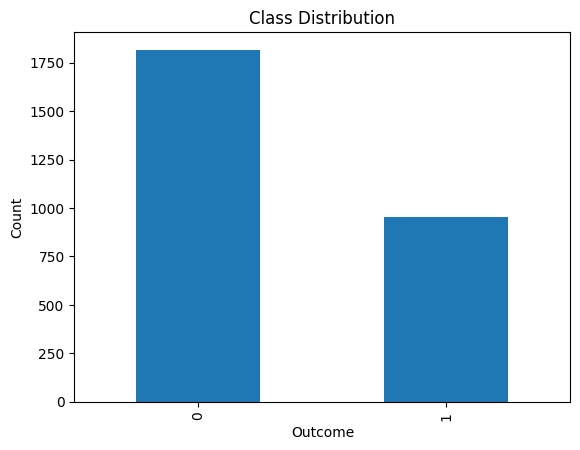

In [50]:
import matplotlib.pyplot as plt
class_counts.plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [51]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
model=LogisticRegression()

In [53]:
#Training the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
#Testing the model using the test data
y_pred=model.predict(X_test)
y1_pred=model.predict([[6,149,70,30,0,33.6,0.627,52]])
print(y1_pred)

[1]


In [55]:
# predicting model biasness
average_prediction = y_pred.mean()
average_actual = y_test.mean()
print("Average Prediction:", average_prediction)
print("Average Actual:", average_actual)

Average Prediction: 0.06433333333333334
Average Actual: 0.0849


In [56]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:",conf_matrix)
print("Class report:", class_report)
from sklearn.metrics import roc_auc_score
# Calculate AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for positive class
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

Accuracy: 0.9525
Confusion matrix: [[27049   404]
 [ 1021  1526]]
Class report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97     27453
           1       0.79      0.60      0.68      2547

    accuracy                           0.95     30000
   macro avg       0.88      0.79      0.83     30000
weighted avg       0.95      0.95      0.95     30000

AUC: 0.9520688683608182
